오토인코더 예제 2

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

In [3]:
encoding_dim = 32

input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

encoded_input = Input(shape=(encoding_dim,))
decoded_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoded_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [4]:
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

x_train = x_train.astype(np.float32)/255.
x_test = x_test.astype(np.float32)/255.

x_train_flatten = x_train.reshape((x_train.shape[0], -1))
x_test_flatten = x_test.reshape((x_test.shape[0], -1))

print(x_train_flatten.shape)
print(x_test_flatten.shape)

(60000, 784)
(10000, 784)


In [5]:
autoencoder.fit(x_train_flatten, x_train_flatten,
                batch_size=256, epochs=50,
                validation_data=(x_test_flatten,x_test_flatten))

Epoch 1/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2764 - val_loss: 0.1907
Epoch 2/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1715 - val_loss: 0.1545
Epoch 3/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1449 - val_loss: 0.1346
Epoch 4/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1293 - val_loss: 0.1222
Epoch 5/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1188 - val_loss: 0.1134
Epoch 6/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1114 - val_loss: 0.1071
Epoch 7/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1060 - val_loss: 0.1026
Epoch 8/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1022 - val_loss: 0.0995
Epoch 9/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0994 - val_loss: 0.0971
Epoch 10/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0976 - val_loss: 0.0955

In [6]:
encoded_imgs = encoder.predict(x_test_flatten)
decoded_imgs = decoder.predict(encoded_imgs)

valid_imgs = autoencoder.predict(x_test_flatten)

313/313 [==============================] - 0s 759us/step


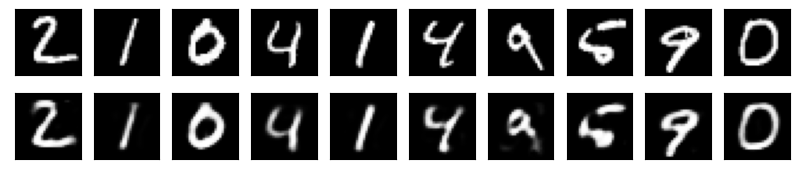

In [8]:
import matplotlib.pyplot as plt

n=10
plt.figure(figsize=(10, 2))
for i in range(1, n+1):

    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_flatten[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2,n, i+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()